In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

inputfile="GermanCredit.csv"
df = pd.read_csv(inputfile)


**Preprocessing**<br>
1. Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)

In [2]:
def columndrop(n):
    highest=(df=='none').sum().nlargest(n)
    #drop n columns that contribute the least to the dataset
    df.drop(highest.index[0:n],axis=1,inplace=True)
    return df

columndrop(3)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',4,'real estate',31,own,1,'unskilled resident',1,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',4,'life insurance',40,own,1,'high qualif/self emp/mgmt',1,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',4,car,38,own,1,skilled,1,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',4,'no known property',23,'for free',1,skilled,1,yes,bad


2.Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.

In [3]:
df = df.replace("'", '', regex=True)

3.The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.

In [4]:
df['checking_status'] = df['checking_status'].replace('no checking', 'No Checking')
df['checking_status'] = df['checking_status'].replace('<0', 'Low')
df['checking_status'] = df['checking_status'].replace('0<=X<200', 'Medium')
df['checking_status'] = df['checking_status'].replace('>=200', 'High')

4. The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').

In [5]:
df['savings_status'] = df['savings_status'].replace('no known savings', 'No Savings')
df['savings_status'] = df['savings_status'].replace('<100', 'Low')
df['savings_status'] = df['savings_status'].replace('100<=X<500', 'Medium')
df['savings_status'] = df['savings_status'].replace('500<=X<1000', 'High')
df['savings_status'] = df['savings_status'].replace('>=1000', 'High')

5.Change class column values from 'good' to '1' and 'bad' to '0'

In [6]:
df['class'] = df['class'].replace('good', '1')
df['class'] = df['class'].replace('bad', '0')

6.Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.

In [7]:
df['employment'] = df['employment'].replace('unemployed', 'Unemployed')
df['employment'] = df['employment'].replace('<1', 'Amateur')
df['employment'] = df['employment'].replace('1<=X<4', 'Professional')
df['employment'] = df['employment'].replace('4<=X<7', 'Experienced')
df['employment'] = df['employment'].replace('>=7', 'Expert')

**Analysis**<br>
1.
a. Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).

In [8]:
pd.crosstab(df["foreign_worker"] , df["class"])

class,0,1
foreign_worker,,
no,4,33
yes,296,667


b. Similarly, get the count of each category of employment for each category of saving_status.

In [9]:
pd.crosstab(df["employment"] , df["savings_status"])

savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


2.Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.

In [10]:
avgcredit=df.loc[(df["employment"] =="Experienced") & (df["personal_status"]=="male single")]["credit_amount"].mean() 
print(f"Average credit_amount: {avgcredit}")

Average credit_amount: 4142.592592592592


3.Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.

In [11]:
df.groupby("job")["duration"].mean()

job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64

4.For the purpose 'education', what is the most common checking_status and savings_status? 

In [12]:
checking=(df[(df["purpose"] =="education")])["checking_status"].mode()
savings=(df[(df["purpose"] =="education")])["savings_status"].mode()
print(f"Most common checking status: {checking[0]}\n"f"Most common savings status: {savings[0]}")


Most common checking status: No Checking
Most common savings status: Low


**Visualization**

1.Plot subplots of two histograms: one with savings_status on the x-axis and personal_status as different colors, and another with checking_status on the x-axis and personal_status as different colors.

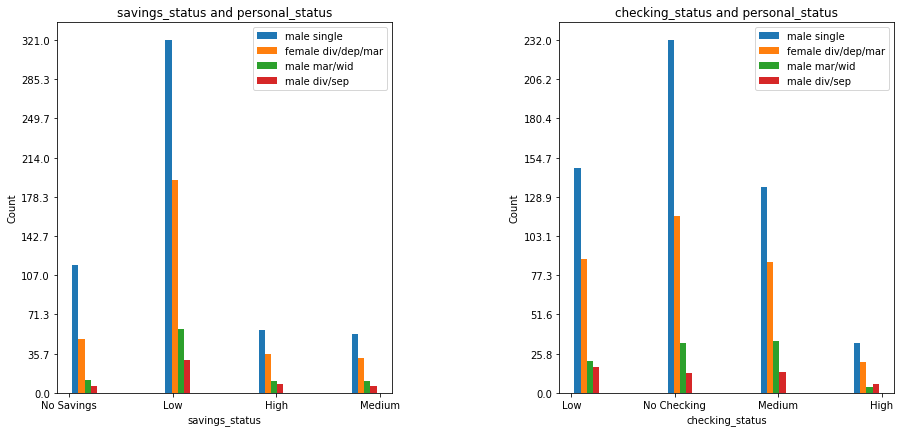

In [13]:
plt.figure(figsize=[15,15])
for i in range(2):
    plt.subplot(2,2, i+1)
   
    if i == 0:  
        #subplot with savings_status on x-axis
        plt.xlabel('savings_status')
        plt.ylabel('Count')
        histogram1=df["personal_status"].value_counts().index
        plt.hist([df[(df["personal_status"]==histogram1[0])]["savings_status"],df[(df["personal_status"]==histogram1[1])]["savings_status"],df[(df["personal_status"]==histogram1[2])]["savings_status"],df[(df["personal_status"]==histogram1[3])]["savings_status"]],label=histogram1)


        plt.title("savings_status and personal_status")
        plt.yticks(np.linspace(0,(df[(df["personal_status"] == histogram1[0])])["savings_status"].value_counts().values.max(),10))
        plt.legend()


    if i == 1:
        #subplot with checking_status on x-axis
        plt.xlabel('checking_status')
        plt.ylabel('Count')
        histogram2=df["personal_status"].value_counts().index
        plt.hist([df[(df["personal_status"]==histogram2[0])]["checking_status"],df[(df["personal_status"]==histogram2[1])]["checking_status"],df[(df["personal_status"]==histogram2[2])]["checking_status"],df[(df["personal_status"]==histogram2[3])]["checking_status"]],label=histogram2)

        plt.title("checking_status and personal_status")
        plt.yticks(np.linspace(0,(df[(df["personal_status"] == histogram2[0])])["checking_status"].value_counts().values.max(),10))
        plt.legend()
        
plt.subplots_adjust(wspace=.5)    
plt.show()

2.For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).

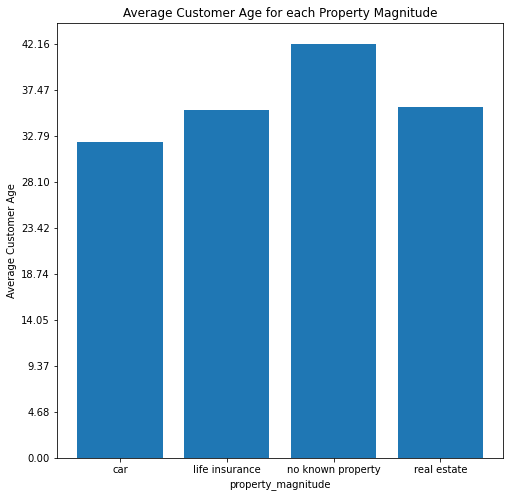

In [14]:
plt.figure(figsize=[8,8])
#property magnitude for people with credit > 4000
people=(df[(df["credit_amount"] > 4000)])["property_magnitude"]
#avg age for that property magnitude
avg=df.groupby(people)["age"].mean()
x=avg.index
y=avg.values
plt.bar(x,y)
plt.yticks((np.linspace(0,y.max(),10)))
plt.xlabel('property_magnitude')
plt.ylabel('Average Customer Age')
plt.title("Average Customer Age for each Property Magnitude")
plt.show()

3.For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:
Personal status
Credit history
Job

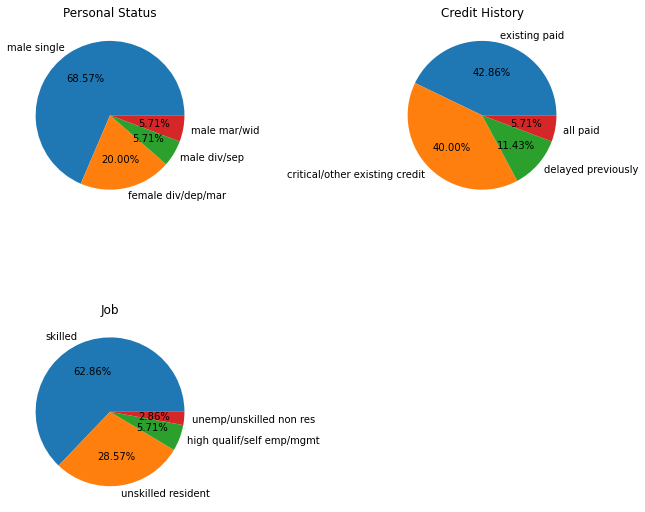

In [15]:
plt.figure(figsize=[10,10])


for i in range(3):
    plt.subplot(2,2, i+1)
    if i == 0:
        personal=(df[(df["savings_status"] == 'High') & (df["age"] > 40)])["personal_status"]
        #pie chart labels
        labelarray1=[]
        for i in personal.value_counts().index:
            labelarray1.append(i)
    
        plt.pie(personal.value_counts(),labels=labelarray1,autopct='%.2f%%')
        plt.title("Personal Status")
        
    if i == 1:
        credit=(df[(df["savings_status"] == 'High') & (df["age"] > 40)])["credit_history"]
        #pie chart labels
        labelarray2=[]
        for i in credit.value_counts().index:
            labelarray2.append(i)
    
        plt.pie(credit.value_counts(),labels=labelarray2,autopct='%.2f%%')
        plt.title("Credit History")
     
    if i == 2:
        job=(df[(df["savings_status"] == 'High') & (df["age"] > 40)])["job"]
        #pie chart labels
        labelarray3=[]
        for i in job.value_counts().index:
            labelarray3.append(i)
    
        plt.pie(job.value_counts(),labels=labelarray3,autopct='%.2f%%')
        plt.title("Job")
    
plt.subplots_adjust(wspace=1)   
plt.show()